In [2]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt

prefix = "MSFT_2012-06-21_34200000_57600000"
features_data = f"./data/features_{prefix}.csv"
labels_data = f"./data/labels_{prefix}.csv"

def load_data(file):
    df = pd.read_csv(file)
    # df = df.dropna()

    if 'timestamp' in df.columns:
        df = df.drop(columns=['timestamp', 'spread', 'imbalance'])

    return df

feature_df = load_data(features_data)
labels_df = load_data(labels_data)

print(f"Features shape: {feature_df.shape}")
print(f"Labels shape: {labels_df.shape}")
display(feature_df.head())
display(labels_df.head())

Features shape: (595800, 480)
Labels shape: (595800, 3)


,ask_5_size,bid_ask_qty_comd,ask_2_size,ask_2_price,spread,ask_1_price,bid_2_price,bid_5_size,direction,bid_ask_qty_diff,...,bid_1_size_rolling_min_1s,bid_1_size_rolling_std_1s,bid_1_size_rolling_mean_3s,bid_1_size_rolling_max_3s,bid_1_size_rolling_min_3s,bid_1_size_rolling_std_3s,bid_1_size_rolling_mean_5s,bid_1_size_rolling_max_5s,bid_1_size_rolling_min_5s,bid_1_size_rolling_std_5s
0,200,4088,100,310500,400,309900,309300,100,-1,3488,...,300.0,NaN,300.0,300.0,300.0,NaN,300.0,300.0,300.0,NaN
1,200,4088,200,310500,400,309900,309300,100,-1,3488,...,300.0,0.0,300.0,300.0,300.0,0.0,300.0,300.0,300.0,0.0
2,200,4088,100,310400,400,309900,309300,100,-1,3488,...,300.0,0.0,300.0,300.0,300.0,0.0,300.0,300.0,300.0,0.0
3,200,4088,100,310400,400,309900,309300,100,-1,3488,...,300.0,0.0,300.0,300.0,300.0,0.0,300.0,300.0,300.0,0.0
4,200,4088,100,310400,400,309900,309300,100,-1,3488,...,300.0,0.0,300.0,300.0,300.0,0.0,300.0,300.0,300.0,0.0


,1s_change,3s_change,5s_change
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [3]:
# from itertools import product
# import numpy as np
# from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
    
# tuner = GridSearchCV(
#     estimator=LGBMClassifier(),
#     param_grid=lgbm_paramgrid,
#     scoring="accuracy",
#     cv=TimeSeriesSplit(n_splits=4),
#     verbose=1,
#     n_jobs=-1,
# )
# tuner.fit(feature_df, labels_df['5s_change'])
# best_param = tuner.best_params_
# print("Done tuning")

In [4]:
from lightgbm import LGBMClassifier, plot_importance
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, labels_df['5s_change'], test_size=0.33)


display(X_train.head())
display(y_train.head())

model = LGBMClassifier()
result = model.fit(X_train, y_train)

,ask_5_size,bid_ask_qty_comd,ask_2_size,ask_2_price,spread,ask_1_price,bid_2_price,bid_5_size,direction,bid_ask_qty_diff,...,bid_1_size_rolling_min_1s,bid_1_size_rolling_std_1s,bid_1_size_rolling_mean_3s,bid_1_size_rolling_max_3s,bid_1_size_rolling_min_3s,bid_1_size_rolling_std_3s,bid_1_size_rolling_mean_5s,bid_1_size_rolling_max_5s,bid_1_size_rolling_min_5s,bid_1_size_rolling_std_5s
576883,20086,70549,32174,300900,100,300800,300600,20221,1,-10659,...,1.0,10404.456465,13597.237542,128500.0,1.0,10404.456465,13597.237542,128500.0,1.0,10404.456465
369133,16212,47226,22250,304000,100,303900,303700,14930,-1,14446,...,1.0,7234.631760,11546.481958,77170.0,1.0,7234.631760,11546.481958,77170.0,1.0,7234.631760
583711,20334,86401,26643,301300,100,301200,301000,52067,-1,-20185,...,1.0,10843.180978,13908.422741,128500.0,1.0,10843.180978,13908.422741,128500.0,1.0,10843.180978
166647,16856,16661,14566,309100,100,309000,308800,14519,1,5753,...,1.0,7159.865348,10259.195580,53900.0,1.0,7159.865348,10259.195580,53900.0,1.0,7159.865348
114622,13883,14463,16595,309100,100,309000,308800,20923,-1,1825,...,1.0,7251.565522,9263.536716,53900.0,1.0,7251.565522,9263.536716,53900.0,1.0,7251.565522


576883    1.0
369133   -1.0
583711    1.0
166647   -1.0
114622   -1.0
Name: 5s_change, dtype: float64

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.410724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 105307
[LightGBM] [Info] Number of data points in the train set: 399186, number of used features: 459
[LightGBM] [Info] Start training from score -1.342051
[LightGBM] [Info] Start training from score -0.719607
[LightGBM] [Info] Start training from score -1.379329


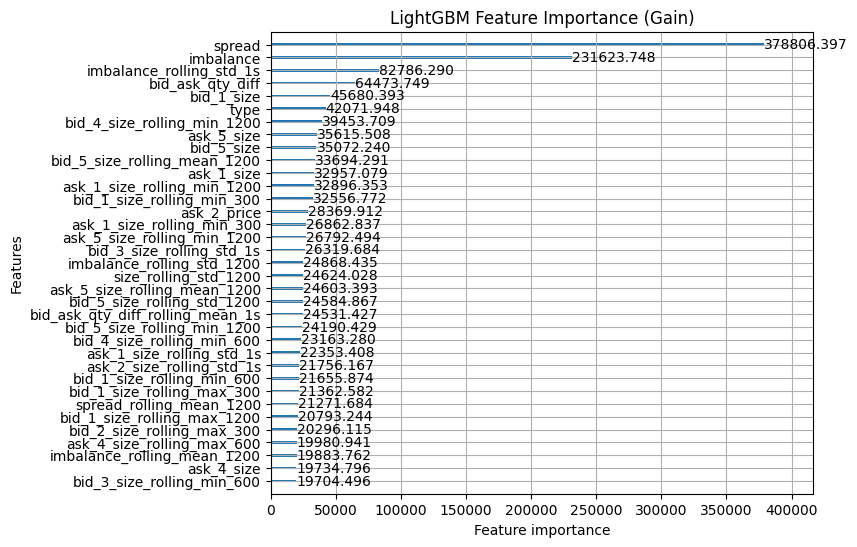

In [5]:
plot_importance(model, importance_type="gain", figsize=(7,6), title="LightGBM Feature Importance (Gain)", max_num_features=35)
plt.show()

In [6]:
# display(X_test.head())
# display(y_test.head())

predictions = model.predict(X_test)

# plt.hist(predictions,alpha=0.5, label='predicted')
# plt.hist(y_test,alpha=0.5, label='true')
# plt.ylabel('Values')
# plt.xlabel('Label')
# plt.legend()
# plt.show()

print(f"Score: {model.score(X_test, y_test)}")

Score: 0.9330057879906822


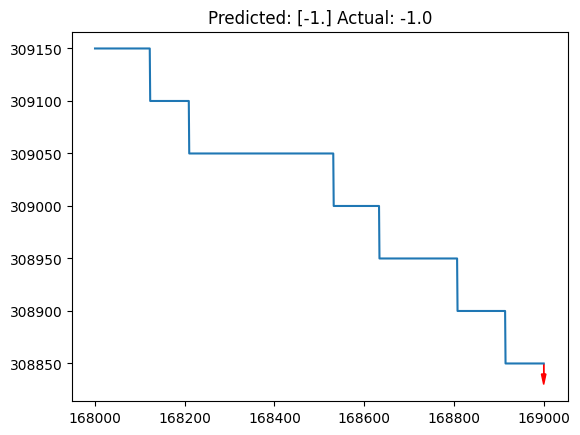

In [76]:
feature_row = feature_df.sample()
start_index = feature_row.index[0]

label = labels_df.loc[feature_row.index]['5s_change'].values[0]
prediction = model.predict(feature_row)

plt.plot(feature_df.loc[start_index - 1_000:start_index]['midprice'])

# draw an arrow based on the prediction
if label == 0:
    plt.arrow(start_index, feature_row.loc[start_index]['midprice'], 10, 0, head_width=10, head_length=10, fc='r', ec='r')
elif label == 1:
    plt.arrow(start_index, feature_row.loc[start_index]['midprice'], 0, 10, head_width=10, head_length=10, fc='r', ec='r')
else:
    plt.arrow(start_index, feature_row.loc[start_index]['midprice'], 0, -10, head_width=10, head_length=10, fc='r', ec='r')
plt.title(f"Predicted: {prediction} Actual: {label}")
plt.show()
